<a href="https://colab.research.google.com/github/kalepravinkumars/RSI_MA_NSE/blob/main/ITR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import yfinance as yf

def calculate_rsi(data, period=14):
    delta = data.diff().dropna()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=period).mean()
    avg_loss = losses.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, period):
    return data.ewm(span=period).mean()

# Fetch stock data from Yahoo Finance
symbol = "SBIN.NS"  # Symbol for SBI stock on NSE
stock_data = yf.download(symbol, start="2019-01-01", end="2022-01-01")

# Calculate RSI
stock_data['RSI'] = calculate_rsi(stock_data['Close'], period=13)

# Calculate EMAs for stock data
ema_periods = [13, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
for period in ema_periods:
    column_name = f'EMA_{period}'
    stock_data[column_name] = calculate_ema(stock_data['Close'], period)

# Calculate EMAs for RSI data
rsi_ema_periods = [55, 35]
for period in rsi_ema_periods:
    column_name = f'RSI_EMA_{period}'
    stock_data[column_name] = calculate_ema(stock_data['RSI'], period)

# Fill missing values with 0
stock_data.fillna(0, inplace=True)

# Print the updated stock data
stock_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI,EMA_13,EMA_8,EMA_21,EMA_34,EMA_55,EMA_89,EMA_144,EMA_233,EMA_377,EMA_610,EMA_987,RSI_EMA_55,RSI_EMA_35
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,297.500000,300.700012,293.850006,299.600006,286.725800,11837127,0.0,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,0.0,0.0
2019-01-02,299.100006,302.500000,293.100006,293.899994,281.270721,25559853,0.0,296.530769,296.393749,296.614285,296.666176,296.698182,296.717977,296.730208,296.737768,296.742440,296.745328,296.747112,0.0,0.0
2019-01-03,295.000000,295.549988,290.100006,291.100006,278.591064,17548347,0.0,294.435435,294.172023,294.598491,294.700607,294.763863,294.803082,294.827349,294.842360,294.851642,294.857381,294.860928,0.0,0.0
2019-01-04,292.100006,299.000000,291.500000,297.649994,284.859558,19514041,0.0,295.433257,295.390985,295.473637,295.504251,295.525220,295.538979,295.547779,295.553332,295.556807,295.558971,295.560315,0.0,0.0
2019-01-07,301.049988,301.500000,295.200012,296.299988,283.567596,14579399,0.0,295.663688,295.673356,295.671809,295.682655,295.691644,295.698097,295.702428,295.705238,295.707024,295.708148,295.708850,0.0,0.0


In [14]:
import pandas as pd
import numpy as np

# Function to generate random buy and sell signals
def generate_random_signals(data):
    np.random.seed(42)
    signals = np.random.choice([0, 1], size=len(data))
    return signals

# Initialize trading_log DataFrame
trading_log = pd.DataFrame(columns=['Close', 'RSI'] + [f'EMA_{period}' for period in ema_periods] + [f'RSI_EMA_{period}' for period in rsi_ema_periods] + ['ProfitLoss', 'Signal'])

# Set initial position to False
position = False

# Generate random buy/sell signals and calculate profit/loss
buy_sell_signals = generate_random_signals(stock_data)
profit_loss = 0.0

# Iterate over the stock_data DataFrame and populate the trading_log DataFrame
for index, row in stock_data.iterrows():
    close_price = row['Close']
    rsi = row['RSI']
    stock_ema_values = [row[f'EMA_{period}'] for period in ema_periods]
    rsi_ema_values = [row[f'RSI_EMA_{period}'] for period in rsi_ema_periods]

    if position:  # Sell signal
        profit_loss += close_price - buy_price
        trading_log.loc[index] = [close_price, rsi] + stock_ema_values + rsi_ema_values + [profit_loss, 0]
        position = False
    else:  # Buy signal
        buy_price = close_price
        trading_log.loc[index] = [close_price, rsi] + stock_ema_values + rsi_ema_values + [profit_loss, 1]
        position = True

# Print the trading_log DataFrame
trading_log.head()


,Close,RSI,EMA_13,EMA_8,EMA_13,EMA_21,EMA_34,EMA_55,EMA_89,EMA_144,EMA_233,EMA_377,EMA_610,EMA_987,RSI_EMA_55,RSI_EMA_35,ProfitLoss,Signal
2019-01-01,299.600006,0.0,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,299.600006,0.0,0.0,0.000000,1.0
2019-01-02,293.899994,0.0,296.530769,296.393749,296.530769,296.614285,296.666176,296.698182,296.717977,296.730208,296.737768,296.742440,296.745328,296.747112,0.0,0.0,-5.700012,0.0
2019-01-03,291.100006,0.0,294.435435,294.172023,294.435435,294.598491,294.700607,294.763863,294.803082,294.827349,294.842360,294.851642,294.857381,294.860928,0.0,0.0,-5.700012,1.0
2019-01-04,297.649994,0.0,295.433257,295.390985,295.433257,295.473637,295.504251,295.525220,295.538979,295.547779,295.553332,295.556807,295.558971,295.560315,0.0,0.0,0.849976,0.0
2019-01-07,296.299988,0.0,295.663688,295.673356,295.663688,295.671809,295.682655,295.691644,295.698097,295.702428,295.705238,295.707024,295.708148,295.708850,0.0,0.0,0.849976,1.0


In [17]:
trading_log['ProfitLoss'].sum()

62315.39442443848

In [20]:
trading_log[trading_log['ProfitLoss']>0]

,Close,RSI,EMA_13,EMA_8,EMA_13,EMA_21,EMA_34,EMA_55,EMA_89,EMA_144,EMA_233,EMA_377,EMA_610,EMA_987,RSI_EMA_55,RSI_EMA_35,ProfitLoss,Signal
2019-01-04,297.649994,0.000000,295.433257,295.390985,295.433257,295.473637,295.504251,295.525220,295.538979,295.547779,295.553332,295.556807,295.558971,295.560315,0.000000,0.000000,0.849976,0.0
2019-01-07,296.299988,0.000000,295.663688,295.673356,295.663688,295.671809,295.682655,295.691644,295.698097,295.702428,295.705238,295.707024,295.708148,295.708850,0.000000,0.000000,0.849976,1.0
2019-01-08,305.299988,0.000000,297.945002,298.420838,297.945002,297.681537,297.530214,297.442078,297.389649,297.358074,297.338874,297.327131,297.319920,297.315482,0.000000,0.000000,9.849976,0.0
2019-01-09,305.299988,0.000000,299.536789,300.267501,299.536789,299.104148,298.845347,298.690736,298.597290,298.540449,298.505671,298.484317,298.471174,298.463071,0.000000,0.000000,9.849976,1.0
2019-01-10,305.549988,0.000000,300.749005,301.622902,300.749005,300.202542,299.865782,299.661157,299.536250,299.459822,299.412891,299.384012,299.366213,299.355231,0.000000,0.000000,10.099976,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,458.049988,29.295417,466.174505,461.629390,466.174505,471.713642,476.258187,475.868153,467.482182,448.127780,416.998044,382.455204,355.333767,338.235374,48.605498,45.512577,228.349838,0.0
2021-12-28,461.200012,33.086886,465.463864,461.533973,465.463864,470.757857,475.397720,475.344291,467.342578,448.308093,417.376504,382.880274,355.714014,338.556017,48.051262,44.822261,228.349838,1.0
2021-12-29,454.399994,25.396812,463.883311,459.948644,463.883311,469.270779,474.197850,474.596280,467.054965,448.392122,417.693497,383.266300,356.068358,338.857916,47.242175,43.743069,221.549820,0.0
2021-12-30,451.700012,26.769628,462.142840,458.115615,462.142840,467.673436,472.912259,473.778556,466.713744,448.437750,417.984654,383.635631,356.411626,339.151820,46.511012,42.800100,221.549820,1.0


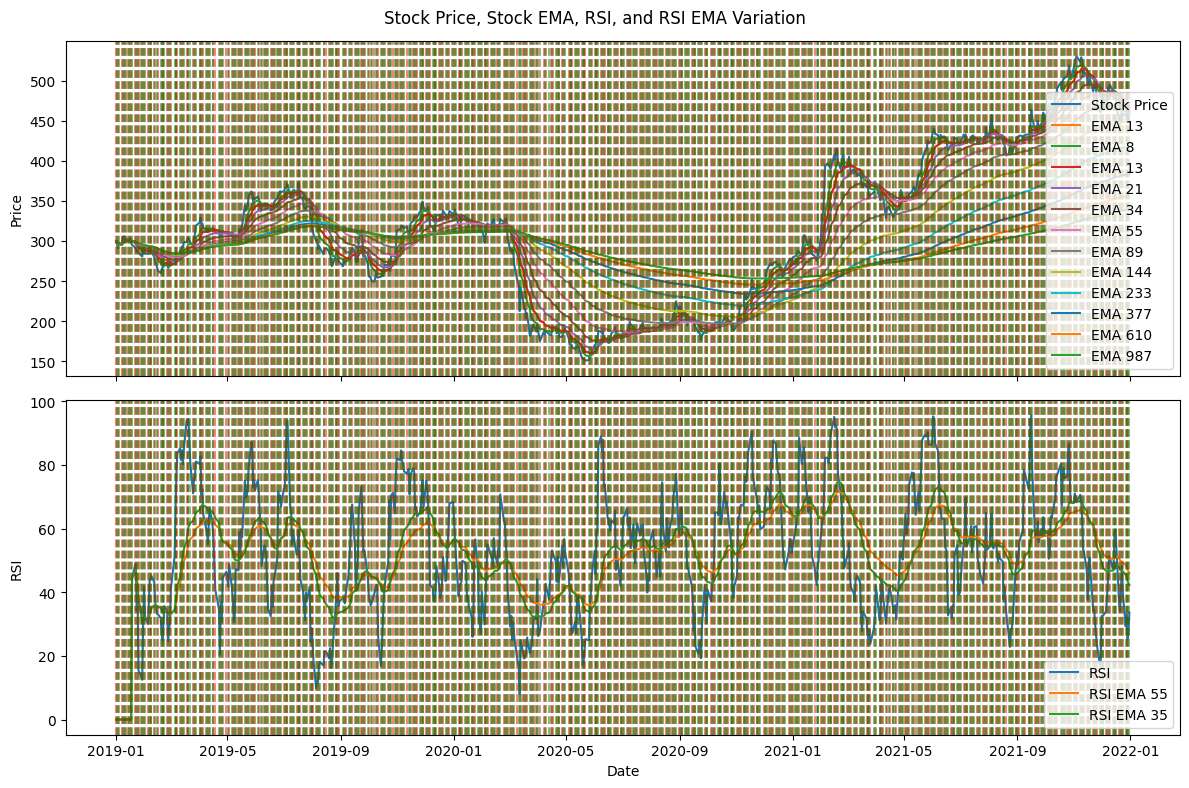

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top plot - Stock Price and Stock EMA
sns.lineplot(data=stock_data, x='Date', y='Close', ax=ax1, label='Stock Price')
for period in ema_periods:
    sns.lineplot(data=stock_data, x='Date', y=f'EMA_{period}', ax=ax1, label=f'EMA {period}')
ax1.set_ylabel('Price')
ax1.legend()

# Bottom plot - RSI and RSI EMA
sns.lineplot(data=stock_data, x='Date', y='RSI', ax=ax2, label='RSI')
for period in rsi_ema_periods:
    sns.lineplot(data=stock_data, x='Date', y=f'RSI_EMA_{period}', ax=ax2, label=f'RSI EMA {period}')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

# Plot buy signals
buy_signals = trading_log[trading_log['Signal'] == 1]
for date in buy_signals.index:
    ax1.axvline(date, color='red', linestyle='--', alpha=0.5)
    ax2.axvline(date, color='red', linestyle='--', alpha=0.5)

# Plot sell signals
sell_signals = trading_log[trading_log['Signal'] == 0]
for date in sell_signals.index:
    ax1.axvline(date, color='green', linestyle='--', alpha=0.5)
    ax2.axvline(date, color='green', linestyle='--', alpha=0.5)

# Set plot title
plt.suptitle('Stock Price, Stock EMA, RSI, and RSI EMA Variation')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.3 MB/s eta 0:00:00


In [30]:
import plotly.graph_objects as go

# Extract the necessary data from the trading_log DataFrame
x = trading_log.index
close_prices = trading_log['Close']
stock_emas = trading_log[[f'EMA_{period}' for period in ema_periods]]
rsi_values = trading_log['RSI']
rsi_emas = trading_log[[f'RSI_EMA_{period}' for period in rsi_ema_periods]]
buy_signals = trading_log[trading_log['Signal'] == 1]
sell_signals = trading_log[trading_log['Signal'] == 0]

# Create the top plot for stock and stock EMA values
fig = go.Figure()

# Add the stock values
fig.add_trace(go.Scatter(x=x, y=close_prices, name='Stock', visible='legendonly'))

# Add the stock EMA values
for period in ema_periods:
    fig.add_trace(go.Scatter(x=x, y=stock_emas[f'EMA_{period}'], name=f'Stock EMA {period}', visible='legendonly'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Create the bottom plot for RSI and RSI EMA values
fig.update_layout(yaxis2=dict(anchor='x2', domain=[0, 0.2]))

# Add the RSI values
fig.add_trace(go.Scatter(x=x, y=rsi_values, name='RSI', yaxis='y2'))

# Add the RSI EMA values
for period in rsi_ema_periods:
    fig.add_trace(go.Scatter(x=x, y=rsi_emas[f'RSI_EMA_{period}'], name=f'RSI EMA {period}', yaxis='y2'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Configure the plot layout
fig.update_layout(
    title='Stock and RSI Variation',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='Stock', side='left'),
    yaxis2=dict(title='RSI', side='right'),
    legend=dict(x=0, y=1, xanchor='left', yanchor='top'),
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='Stock',
                    method='update',
                    args=[{'visible': [True, False, True, False]}, {'yaxis': {'title': 'Stock'}}]
                ),
                dict(
                    label='Stock EMA',
                    method='update',
                    args=[{'visible': [False, True, False, True]}, {'yaxis': {'title': 'Stock EMA'}}]
                ),
                dict(
                    label='RSI',
                    method='update',
                    args=[{'visible': [True, False, True, False]}, {'yaxis': {'title': 'RSI'}}]
                ),
                dict(
                    label='RSI EMA',
                    method='update',
                    args=[{'visible': [False, True, False, True]}, {'yaxis': {'title': 'RSI EMA'}}]
                )
            ],
            direction='down',
            showactive=True,
            x=0.5,
            xanchor='center',
            y=1.1,
            yanchor='top'
        )
    ]
)

# Show the plot
fig.show()


In [28]:
import plotly.graph_objects as go

# Extract the necessary data from the trading_log DataFrame
x = trading_log.index
close_prices = trading_log['Close']
stock_emas = trading_log[[f'EMA_{period}' for period in ema_periods]]
rsi_values = trading_log['RSI']
rsi_emas = trading_log[[f'RSI_EMA_{period}' for period in rsi_ema_periods]]
buy_signals = trading_log[trading_log['Signal'] == 1]
sell_signals = trading_log[trading_log['Signal'] == 0]

# Create the top plot for stock and stock EMA values
fig = go.Figure()

# Add the stock values
fig.add_trace(go.Scatter(x=x, y=close_prices, name='Stock'))

# Add the stock EMA values
for period in ema_periods:
    fig.add_trace(go.Scatter(x=x, y=stock_emas[f'EMA_{period}'], name=f'Stock EMA {period}'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Create the bottom plot for RSI and RSI EMA values
fig.update_layout(yaxis2=dict(anchor='x2', domain=[0, 0.2]))

# Add the RSI values
fig.add_trace(go.Scatter(x=x, y=rsi_values, name='RSI', yaxis='y2'))

# Add the RSI EMA values
for period in rsi_ema_periods:
    fig.add_trace(go.Scatter(x=x, y=rsi_emas[f'RSI_EMA_{period}'], name=f'RSI EMA {period}', yaxis='y2'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Configure the plot layout
fig.update_layout(
    title='Stock and RSI Variation',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='Stock', side='left'),
    yaxis2=dict(title='RSI', side='right'),
    legend=dict(x=0, y=1, xanchor='left', yanchor='top'),
    height=600
)

# Display the plot
fig.show()


In [31]:
import plotly.graph_objects as go

# Extract the necessary data from the trading_log DataFrame
x = trading_log.index
close_prices = trading_log['Close']
stock_emas = trading_log[[f'EMA_{period}' for period in ema_periods]]
rsi_values = trading_log['RSI']
rsi_emas = trading_log[[f'RSI_EMA_{period}' for period in rsi_ema_periods]]
buy_signals = trading_log[trading_log['Signal'] == 1]
sell_signals = trading_log[trading_log['Signal'] == 0]

# Create the top plot for stock and stock EMA values
fig = go.Figure()

# Add the stock values
fig.add_trace(go.Scatter(x=x, y=close_prices, name='Stock'))

# Add the stock EMA values
for period in ema_periods:
    fig.add_trace(go.Scatter(x=x, y=stock_emas[f'EMA_{period}'], name=f'Stock EMA {period}'))

# Create the bottom plot for RSI and RSI EMA values
fig.add_trace(go.Scatter(x=x, y=rsi_values, name='RSI'))

# Add the RSI EMA values
for period in rsi_ema_periods:
    fig.add_trace(go.Scatter(x=x, y=rsi_emas[f'RSI_EMA_{period}'], name=f'RSI EMA {period}'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Configure the plot layout
fig.update_layout(
    title='Stock and RSI Variation',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='Stock', side='left'),
    yaxis2=dict(title='RSI', side='right', overlaying='y', anchor='x', position=0.95),
    legend=dict(x=0, y=1, xanchor='left', yanchor='top'),
    height=600
)

# Display the plot
fig.show()


In [32]:
import plotly.graph_objects as go

# Extract the necessary data from the trading_log DataFrame
x = trading_log.index
close_prices = trading_log['Close']
rsi_values = trading_log['RSI']
rsi_emas = trading_log[[f'RSI_EMA_{period}' for period in rsi_ema_periods]]
buy_signals = trading_log[trading_log['Signal'] == 1]
sell_signals = trading_log[trading_log['Signal'] == 0]

# Create the top plot for stock and stock EMA values
fig = go.Figure()

# Add the stock values
fig.add_trace(go.Scatter(x=x, y=close_prices, name='Stock'))

# Add the stock EMA values
for period in ema_periods:
    fig.add_trace(go.Scatter(x=x, y=stock_emas[f'EMA_{period}'], name=f'Stock EMA {period}'))

# Create the bottom plot for RSI and RSI EMA values
fig.add_trace(go.Scatter(x=x, y=rsi_values, name='RSI'))

# Add the RSI EMA values
for period in rsi_ema_periods:
    fig.add_trace(go.Scatter(x=x, y=rsi_emas[f'RSI_EMA_{period}'], name=f'RSI EMA {period}'))

# Add vertical lines for buy and sell signals
for index, _ in buy_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='red'))
for index, _ in sell_signals.iterrows():
    fig.add_shape(type='line', x0=index, y0=0, x1=index, y1=1, xref='x', yref='paper', line=dict(color='green'))

# Configure the plot layout
fig.update_layout(
    title='Stock and RSI Variation',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='Stock', side='left'),
    yaxis2=dict(title='RSI', side='right', overlaying='y', anchor='x', position=0),
    legend=dict(x=0, y=1, xanchor='left', yanchor='top'),
    height=600
)

# Display the plot
fig.show()
